In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import rankdata

import scipy.spatial
from itertools import combinations
from scipy.spatial.distance import pdist
from scipy import optimize

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
plt.style.use('ggplot')

In [3]:
locations = pd.read_csv('Data\stations.txt', sep=' ', index_col=0)

locations.head(20)

,database,station_latitude(dec.degree),station_longitude(dec.degree),station_altitude(m)
station_name,,,,
TILLABERI,AMMA-CATCH,14.204300,1.454500,212.0
TOBRE,AMMA-CATCH,10.199100,2.133500,371.0
TARA,AMMA-CATCH,15.251400,-1.585500,335.0
AGOUFOU,AMMA-CATCH,15.360000,-1.470000,340.0
LAWRA,MARLOES,10.866670,-1.483330,305.0
NAVRONGO,MARLOES,10.530000,-1.050000,201.3
OUAHIGOUYA,MARLOES,13.520000,-2.390000,365.0
TAMALE,MARLOES,9.330000,-0.510000,183.3
WA,MARLOES,10.030000,-2.090000,322.7


In [20]:
# load the .csv 

TILLABERItrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TILLABERItrainTable9.csv", index_col=0)
TOBREtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TOBREtrainTable9.csv", index_col=0)
TARAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TARAtrainTable9.csv", index_col=0)
AGOUFOUtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\AGOUFOUtrainTable9.csv", index_col=0)
LAWRAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\LAWRAtrainTable9.csv", index_col=0)
# NAVRONGOtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\\NAVRONGOtrainTable9.csv", index_col=0)
OUAHIGOUYAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\OUAHIGOUYAtrainTable9.csv", index_col=0)
# TAMALEtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TAMALEtrainTable9.csv", index_col=0)
# WAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\WAtrainTable9.csv", index_col=0)
# ZUARUNGUtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\ZUARUNGUtrainTable9.csv", index_col=0)
# ANIABISItrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\ANIABISItrainTable9.csv", index_col=0)
# POUDRItrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\POUDRItrainTable9.csv", index_col=0)
# LAREtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\LAREtrainTable9.csv", index_col=0)
# YABOGANEtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\YABOGANEtrainTable9.csv", index_col=0)

## 3. Tara station

## Multi-linear regression using the 9-pixels, 3-days resolution
First the dataset is going to be resampled to 3-day temporal resolution. No outlier extraction.


In [22]:
TARAtrainTable9.index = pd.to_datetime(TARAtrainTable9.index, errors='coerce')

TARAtrainTable9 = TARAtrainTable9.resample(rule = '3d').sum()

TARAtrainTable9

,R[mm],UpperLeft[mm],UpperCenter[mm],UpperRight[mm],MiddleLeft[mm],MiddleCenter[mm],MiddleRight[mm],LowerLeft[mm],LowerCenter[mm],LowerRight[mm]
Date,,,,,,,,,,
2004-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-05-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-05-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-05-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data = TARAtrainTable9.to_numpy()

y = data[:, 0]  # first collumn named R[mm] is the ground measurements (regressand)
X = data[:, 1:10] # next nine collumns are the pixel value time-series (regressor)


X.shape

(1543, 9)

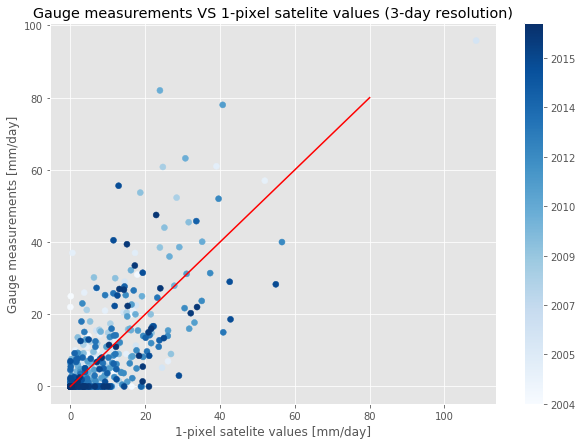

In [38]:
TARAtrainTable9.index = pd.to_datetime(TARAtrainTable9.index, errors='coerce')

plt.figure(figsize=(10, 7))

plt.scatter(X[:, 4], y, c=range(len(y)), cmap="Blues")
plt.colorbar()
plt.plot(np.linspace(0, 80, 2), np.linspace(0, 80, 2), 'r')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrainTable9.index.year[np.arange(0, len(TARAtrainTable9.index), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)



plt.xlabel('1-pixel satelite values [mm/day]')
plt.ylabel('Gauge measurements [mm/day]')

plt.title(f'Gauge measurements VS 1-pixel satelite values (3-day resolution)');

In [26]:
# train, validation and test datasets

X_tra, X_tst, y_tra, y_tst = train_test_split(X, y, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence
X_tra, X_val, y_tra, y_val = train_test_split(X_tra, y_tra, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence

for name, x in zip(['TRAINING','VALIDATION','TEST'],[X_tra, X_val, X_tst]):
    print(f'{name} dataset is {len(x)} rows long')

TRAINING dataset is 1081 rows long
VALIDATION dataset is 231 rows long
TEST dataset is 231 rows long


In [27]:
# fit MLR model

model = LinearRegression(fit_intercept = True)
model.fit(X_tra ,y_tra)

est_coefficients = [model.intercept_] + model.coef_.tolist()

names = ['Intercept',
         'UpperLeft pixel',
         'UpperCenter pixel',
         'UpperRight pixel',
         'MiddleLeft pixel',
         'MiddleCenter pixel',
         'MiddleRight pixel', 
         'LowerLeft pixel',
         'LowerCenter pixel',
         'LowerRight pixel'] 

for i, coef in enumerate(est_coefficients):
    print(f'coefficient {names[i]} = {coef:.3f}')

coefficient Intercept = 0.104
coefficient UpperLeft pixel = -0.731
coefficient UpperCenter pixel = -0.260
coefficient UpperRight pixel = 0.755
coefficient MiddleLeft pixel = 0.991
coefficient MiddleCenter pixel = -0.338
coefficient MiddleRight pixel = 0.797
coefficient LowerLeft pixel = 0.744
coefficient LowerCenter pixel = -0.305
coefficient LowerRight pixel = -0.721


In [28]:
# model performance

# training
yh = model.predict(X_tra)
MAEtraining = mean_absolute_error(y_tra, yh)
RMSEtraining = np.sqrt(mean_squared_error(y_tra, yh))
Rtraining = np.sqrt(r2_score(y_tra, yh))

In [29]:
# model performance

# validation
yh = model.predict(X_val)
MAEvalidation = mean_absolute_error(y_val, yh)
RMSEvalidation = np.sqrt(mean_squared_error(y_val, yh))
Rvalidation = np.sqrt(r2_score(y_val, yh))

In [30]:
# model performance

# test
yh = model.predict(X_tst)
MAEtest = mean_absolute_error(y_tst, yh)
RMSEtest = np.sqrt(mean_squared_error(y_tst, yh))
Rtest = np.sqrt(r2_score(y_tst, yh))

In [31]:
# present metric Mean absolute error

print('Mean absolute error')
print(' ')
print(f'Training: {MAEtraining:.2f}')
print(f'Validation: {MAEvalidation:.2f}')
print(f'Test: {MAEtest:.2f}')

Mean absolute error
 
Training: 1.85
Validation: 1.87
Test: 1.97


In [32]:
# present metric Root mean squared error

print('Root mean squared error')
print(' ')
print(f'Training: {RMSEtraining:.2f}')
print(f'Validation: {RMSEvalidation:.2f}')
print(f'Test: {RMSEtest:.2f}')

Root mean squared error
 
Training: 4.95
Validation: 5.70
Test: 4.85


In [33]:
# present metric R

print('R metric')
print(' ')
print(f'Training: {Rtraining:.2f}')
print(f'Validation: {Rvalidation:.2f}')
print(f'Test: {Rtest:.2f}')

R metric
 
Training: 0.80
Validation: 0.76
Test: 0.82


## Multi-linear regression using the 9-pixels and observation t-1 mean of satelite
No outlier extraction.

In [34]:
data = TARAtrainTable9.to_numpy()

y = data[:, 0]  # first collumn named R[mm] is the ground measurements (regressand)
X = data[:, 1:10] # next nine collumns are the pixel value time-series (regressor)



mean_pixel = X.mean(axis = 1)[..., None]  # time series of the mean of the pixels

# have to drop the first rows of X and y to use the center pixel[t-1] value
y = y[1:]
X = X[1:]

# have to drop the last rows of center pixel[t-1] for the arrays to be equal
mean_pixel = mean_pixel[0:-1]

X = np.hstack((X, mean_pixel))

X.shape

(1542, 10)

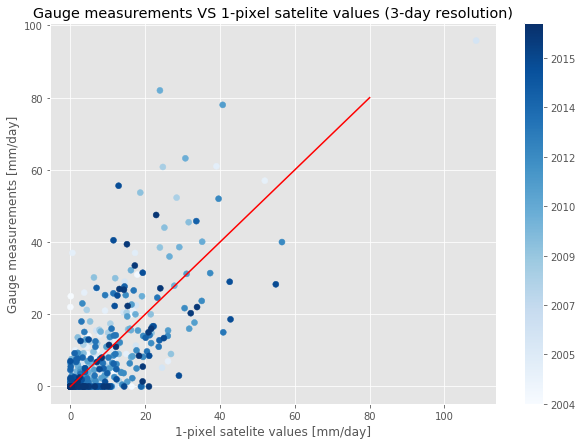

In [37]:
plt.figure(figsize=(10, 7))

plt.scatter(X[:, 4], y, c=range(len(y)), cmap="Blues")
plt.colorbar()
plt.plot(np.linspace(0, 80, 2), np.linspace(0, 80, 2), 'r')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrainTable9.index.year[np.arange(0, len(TARAtrainTable9.index), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)



plt.xlabel('1-pixel satelite values [mm/day]')
plt.ylabel('Gauge measurements [mm/day]')

plt.title(f'Gauge measurements VS 1-pixel satelite values (3-day resolution)');

In [39]:
# train, validation and test datasets

X_tra, X_tst, y_tra, y_tst = train_test_split(X, y, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence
X_tra, X_val, y_tra, y_val = train_test_split(X_tra, y_tra, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence

for name, x in zip(['TRAINING','VALIDATION','TEST'],[X_tra, X_val, X_tst]):
    print(f'{name} dataset is {len(x)} rows long')

TRAINING dataset is 1080 rows long
VALIDATION dataset is 231 rows long
TEST dataset is 231 rows long


In [40]:
# fit MLR model

model = LinearRegression(fit_intercept = True)
model.fit(X_tra ,y_tra)

est_coefficients = [model.intercept_] + model.coef_.tolist()

names = ['Intercept',
         'UpperLeft pixel',
         'UpperCenter pixel',
         'UpperRight pixel',
         'MiddleLeft pixel',
         'MiddleCenter pixel',
         'MiddleRight pixel', 
         'LowerLeft pixel',
         'LowerCenter pixel',
         'LowerRight pixel',
         'Lag-1 mean'] 

for i, coef in enumerate(est_coefficients):
    print(f'coefficient {names[i]} = {coef:.3f}')

coefficient Intercept = 0.080
coefficient UpperLeft pixel = 0.119
coefficient UpperCenter pixel = -1.732
coefficient UpperRight pixel = 2.051
coefficient MiddleLeft pixel = 1.115
coefficient MiddleCenter pixel = -0.385
coefficient MiddleRight pixel = 0.018
coefficient LowerLeft pixel = 1.218
coefficient LowerCenter pixel = -0.955
coefficient LowerRight pixel = -0.343
coefficient Lag-1 mean = -0.013


In [41]:
# model performance

# training
yh = model.predict(X_tra)
MAEtraining = mean_absolute_error(y_tra, yh)
RMSEtraining = np.sqrt(mean_squared_error(y_tra, yh))
Rtraining = np.sqrt(r2_score(y_tra, yh))

# validation
yh = model.predict(X_val)
MAEvalidation = mean_absolute_error(y_val, yh)
RMSEvalidation = np.sqrt(mean_squared_error(y_val, yh))
Rvalidation = np.sqrt(r2_score(y_val, yh))

# test
yh = model.predict(X_tst)
MAEtest = mean_absolute_error(y_tst, yh)
RMSEtest = np.sqrt(mean_squared_error(y_tst, yh))
Rtest = np.sqrt(r2_score(y_tst, yh))

In [42]:
# present metric Mean absolute error

print('Mean absolute error')
print(' ')
print(f'Training: {MAEtraining:.2f}')
print(f'Validation: {MAEvalidation:.2f}')
print(f'Test: {MAEtest:.2f}')

Mean absolute error
 
Training: 1.97
Validation: 2.11
Test: 1.78


In [43]:
# present metric Root mean squared error

print('Root mean squared error')
print(' ')
print(f'Training: {RMSEtraining:.2f}')
print(f'Validation: {RMSEvalidation:.2f}')
print(f'Test: {RMSEtest:.2f}')

Root mean squared error
 
Training: 5.26
Validation: 5.49
Test: 4.64


In [44]:
# present metric R

print('R metric')
print(' ')
print(f'Training: {Rtraining:.2f}')
print(f'Validation: {Rvalidation:.2f}')
print(f'Test: {Rtest:.2f}')

R metric
 
Training: 0.81
Validation: 0.52
Test: 0.75


In [45]:
y_mod = est_coefficients[0] + est_coefficients[1] * X[:, 0] + est_coefficients[2] * X[:, 1] + est_coefficients[3] * X[:, 2] + est_coefficients[4] * X[:, 3] + est_coefficients[5] * X[:, 4] + est_coefficients[6] * X[:, 5] + est_coefficients[7] * X[:, 6] + est_coefficients[8] * X[:, 7] + est_coefficients[9] * X[:, 8] + est_coefficients[10] * X[:, 9]

In [46]:
rho = np.corrcoef(y, y_mod)
rho = rho[0][1]
# rho

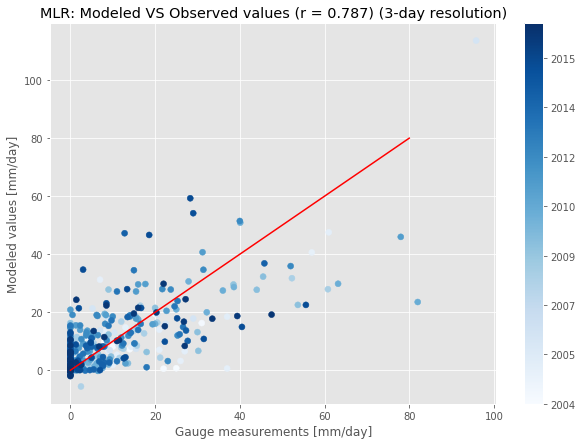

In [48]:
plt.figure(figsize=(10, 7))

plt.scatter(y, y_mod, c=range(len(y)), cmap="Blues")
plt.colorbar()
plt.plot(np.linspace(0, 80, 2), np.linspace(0, 80, 2), 'r')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrainTable9.index.year[np.arange(0, len(TARAtrainTable9.index), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.ylabel('Modeled values [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'MLR: Modeled VS Observed values (r = {rho:.3f}) (3-day resolution)');

## MLR using Keras

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import initializers

In [50]:
# split data

X_tra, X_tst, y_tra, y_tst = train_test_split(X,y, test_size=int(np.round(0.15 * len(X))), random_state = None)
X_tra, X_val, y_tra, y_val = train_test_split(X_tra,y_tra, test_size=int(np.round(0.15 * len(X))), random_state = None)

for name, x in zip(['TRAINING','VALIDATION','TEST'],[X_tra, X_val, X_tst]):
    print(f'{name} dataset is {len(x)} rows long')

TRAINING dataset is 1080 rows long
VALIDATION dataset is 231 rows long
TEST dataset is 231 rows long


In [51]:
i = Input(shape = X.shape[1])       
x = Dense(1, activation = None, use_bias = True,     # no activation function for linear regression  
          kernel_initializer = initializers.RandomNormal(stddev=0.1),
          bias_initializer = initializers.RandomNormal(stddev=0.1))(i)  

model5 = Model(i, x) 

print(model5.summary())  # 10 weights + bias

model5.compile(optimizer=SGD(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])  # DEFINE LEARNING RATE
r = model5.fit(X_tra, y_tra, epochs = 10, verbose = 2, validation_data=(X_val, y_val))

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
34/34 - 0s - loss: 34.2766 - mae: 1.9721 - val_loss: 23.0918 - val_mae: 1.8993
Epoch 2/10
34/34 - 0s - loss: 29.8837 - mae: 1.9473 - val_loss: 22.1999 - val_mae: 1.8301
Epoch 3/10
34/34 - 0s - loss: 29.3827 - mae: 1.9195 - val_loss: 26.7847 - val_mae: 2.1000
Epoch 4/10
34/34 - 0s - loss: 29.4201 - mae: 1.9604 - val_loss: 23.1692 - val_mae: 1.8933
Epoch 5/10
34/34 - 0s - loss: 29.7856 - mae: 1.9365 - val_loss: 23.4061 - val_mae: 1.9086
Epoch 6/10
34/34 - 0s - loss: 29.4321 - mae: 1.9223 - val_loss: 2

In [52]:
# coefficients estimation

weights, bias = model5.get_weights()
for i, w in enumerate(weights):
  print(f'w{i} = {w[0]:6.3f}')
print(f'bias = {bias[0]:6.3f}')

w0 =  0.246
w1 =  0.068
w2 =  0.056
w3 =  0.158
w4 = -0.121
w5 =  0.144
w6 =  0.047
w7 =  0.185
w8 =  0.224
w9 = -0.028
bias = -0.026



Plot training history
--------------------------------------------------


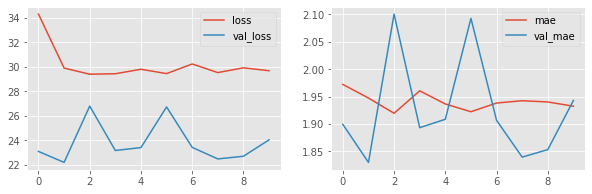

In [53]:
print('\nPlot training history')
print('-----'*10)

# plot results
f, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(r.history['loss'], label = 'loss')
ax[0].plot(r.history['val_loss'], label = 'val_loss')
ax[0].legend()
ax[1].plot(r.history['mae'], label = 'mae')
ax[1].plot(r.history['val_mae'], label = 'val_mae')
ax[1].legend();

In [54]:
# model5 performance

# training
yh = model5.predict(X_tra)
MAEtraining = mean_absolute_error(y_tra, yh)
RMSEtraining = np.sqrt(mean_squared_error(y_tra, yh))
Rtraining = np.sqrt(r2_score(y_tra, yh))

# validation
yh = model5.predict(X_val)
MAEvalidation = mean_absolute_error(y_val, yh)
RMSEvalidation = np.sqrt(mean_squared_error(y_val, yh))
Rvalidation = np.sqrt(r2_score(y_val, yh))

# test
yh = model5.predict(X_tst)
MAEtest = mean_absolute_error(y_tst, yh)
RMSEtest = np.sqrt(mean_squared_error(y_tst, yh))
Rtest = np.sqrt(r2_score(y_tst, yh))

In [55]:
# present metric Mean absolute error

print('Mean absolute error')
print(' ')
print(f'Training: {MAEtraining:.2f}')
print(f'Validation: {MAEvalidation:.2f}')
print(f'Test: {MAEtest:.2f}')

print('-----'*10)

# present metric Root mean squared error

print('Root mean squared error')
print(' ')
print(f'Training: {RMSEtraining:.2f}')
print(f'Validation: {RMSEvalidation:.2f}')
print(f'Test: {RMSEtest:.2f}')

print('-----'*10)

# present metric R

print('R metric')
print(' ')
print(f'Training: {Rtraining:.2f}')
print(f'Validation: {Rvalidation:.2f}')
print(f'Test: {Rtest:.2f}')

Mean absolute error
 
Training: 1.92
Validation: 1.94
Test: 1.59
--------------------------------------------------
Root mean squared error
 
Training: 5.37
Validation: 4.90
Test: 4.07
--------------------------------------------------
R metric
 
Training: 0.80
Validation: 0.64
Test: 0.77


In [56]:
y_mod = model5.predict(X)

In [57]:
rho = np.corrcoef(y, y_mod[:, 0])
rho = rho[0][1]
# rho

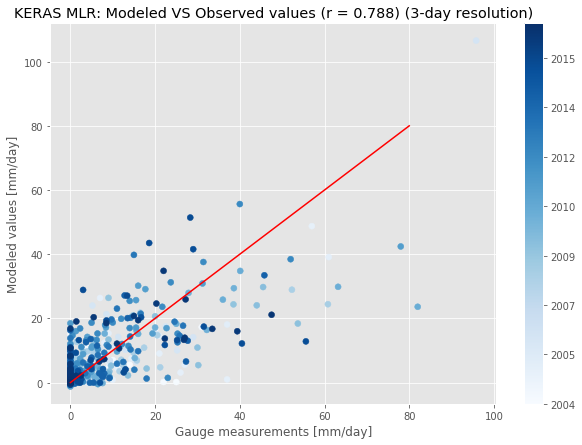

In [60]:
plt.figure(figsize=(10, 7))

plt.scatter(y, y_mod, c=range(len(y)), cmap="Blues")
plt.colorbar()
plt.plot(np.linspace(0, 80, 2), np.linspace(0, 80, 2), 'r')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrainTable9.index.year[np.arange(0, len(TARAtrainTable9.index), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.ylabel('Modeled values [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'KERAS MLR: Modeled VS Observed values (r = {rho:.3f}) (3-day resolution)');